In [25]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import warnings
warnings.filterwarnings("ignore")


In [26]:
file = 'D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv'
df1 = pd.read_csv(file,index_col = 0)

In [27]:
df1.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [28]:
df1.shape

(246009, 122)

In [29]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# 1st Cleaning 

In [30]:
# Check null
round(df1.isnull().sum() / df1.shape[0] * 100,2)

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
SK_ID_CURR                     0.0
Length: 122, dtype: float64

In [31]:
# Remove all the cols have %null > 90% 
from Functions import find_and_remove_null_cols
df1 = find_and_remove_null_cols(df1)

In [32]:
### Split df into 2 small ones, numerical and categorical 
numerical_data = df1._get_numeric_data()
categorical_data = df1.drop(columns=numerical_data.columns)

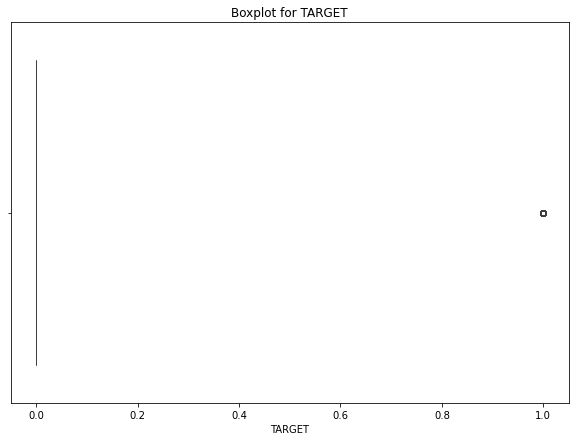

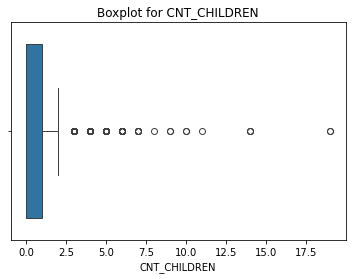

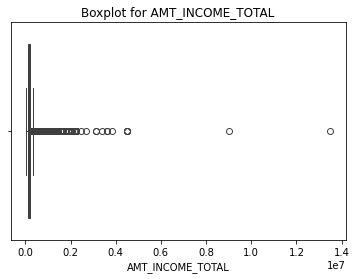

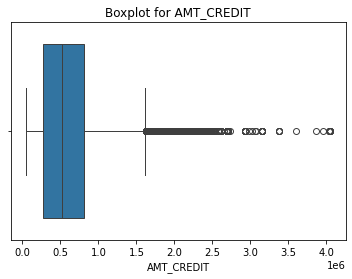

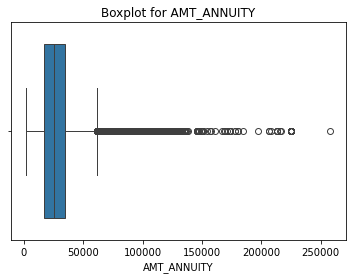

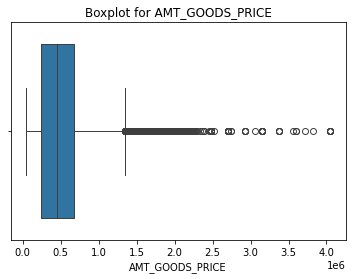

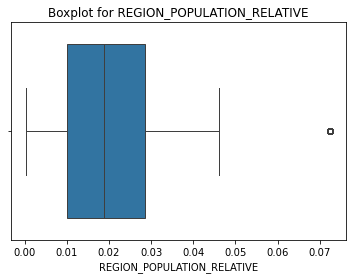

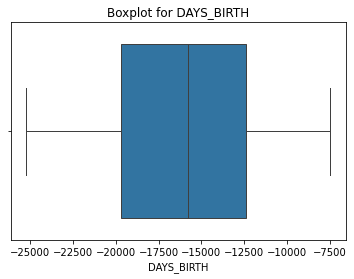

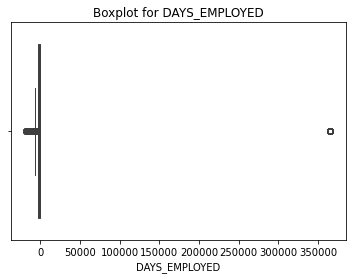

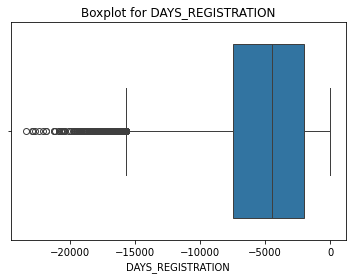

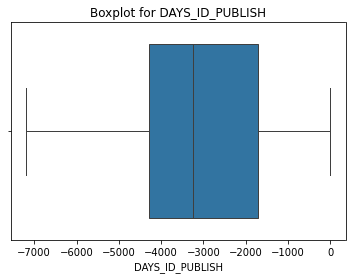

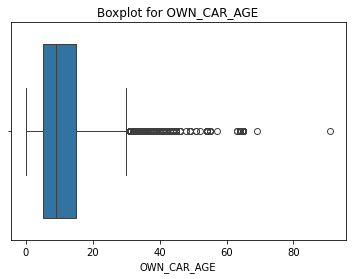

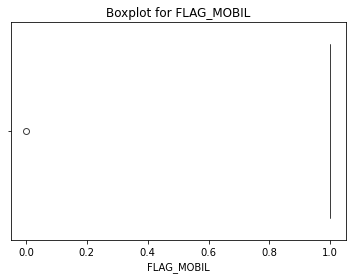

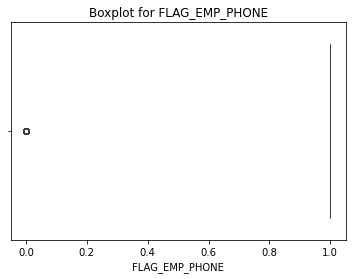

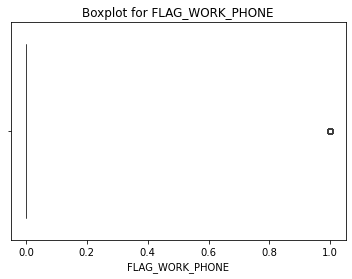

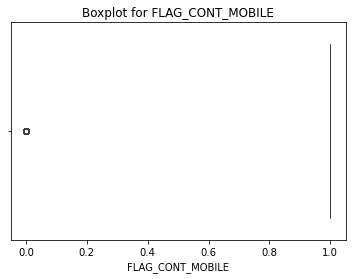

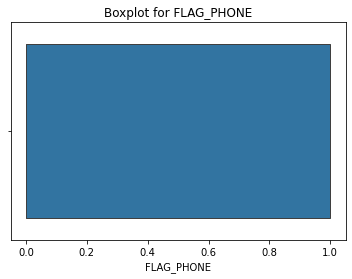

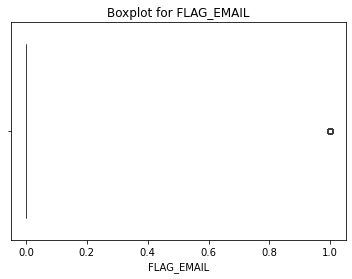

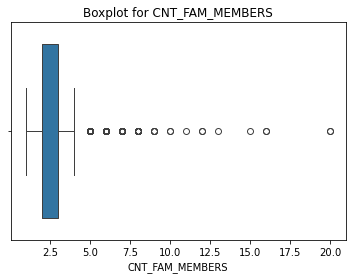

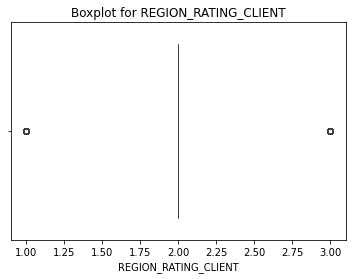

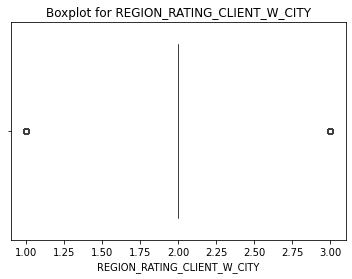

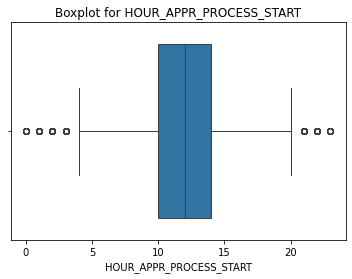

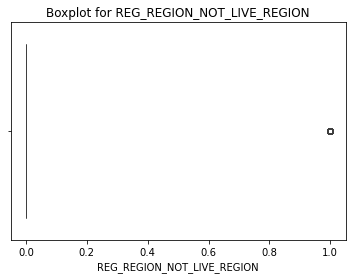

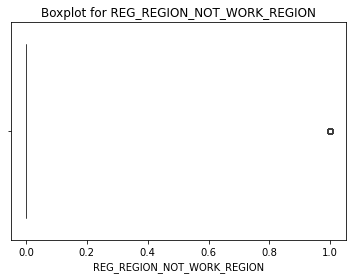

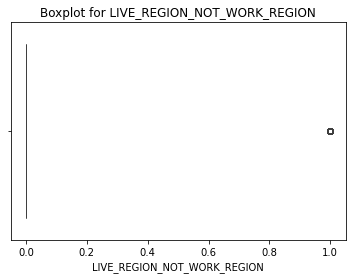

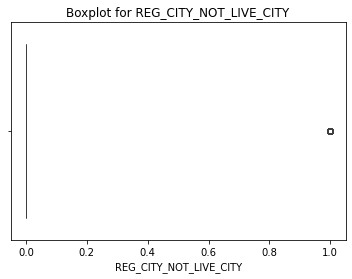

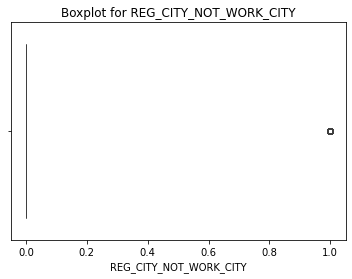

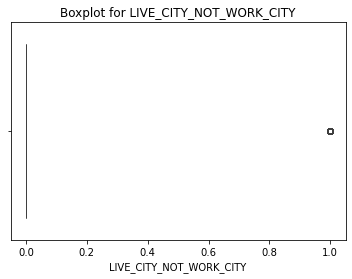

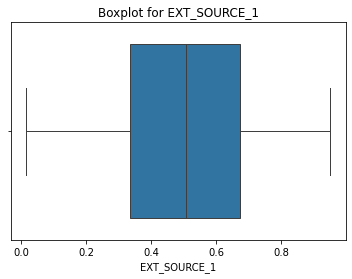

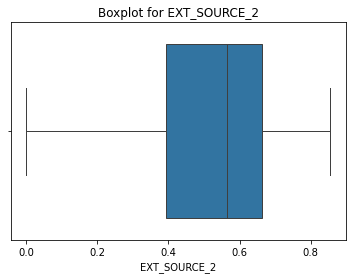

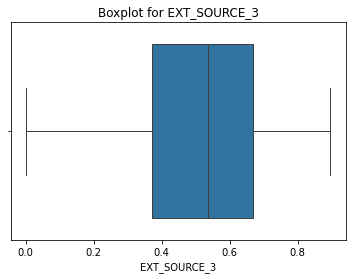

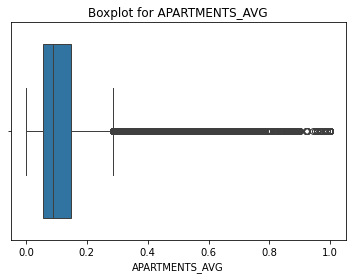

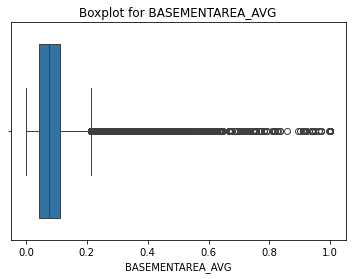

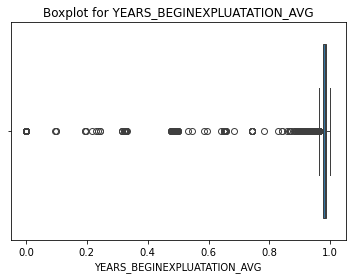

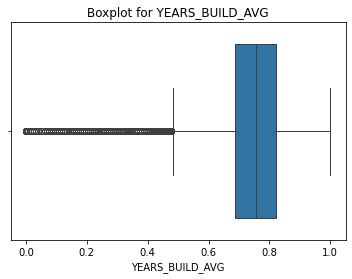

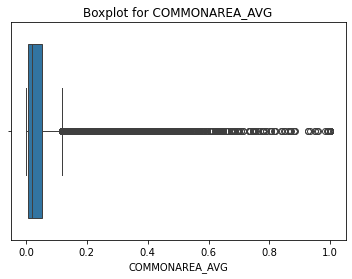

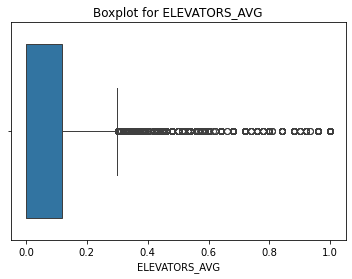

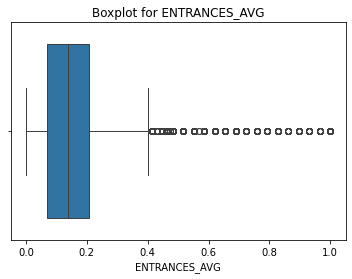

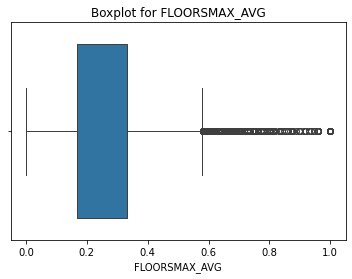

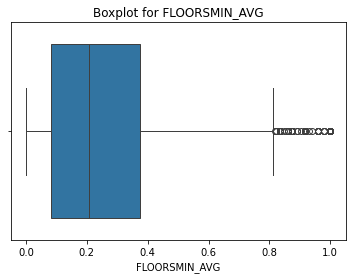

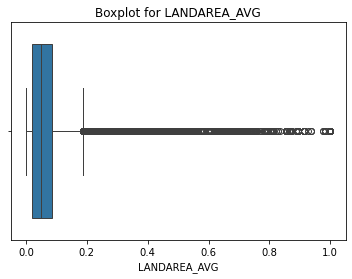

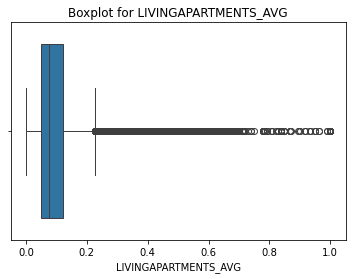

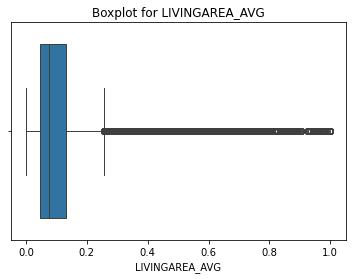

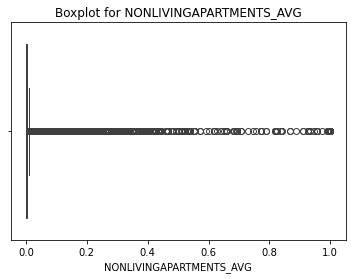

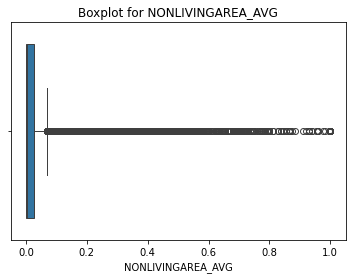

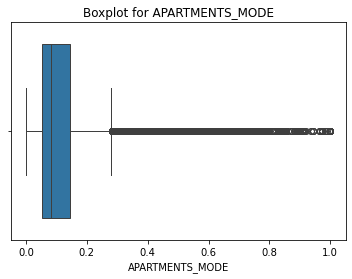

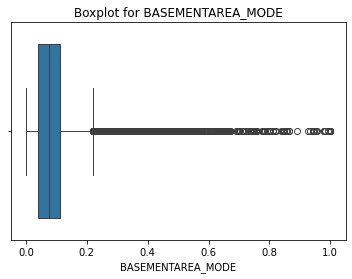

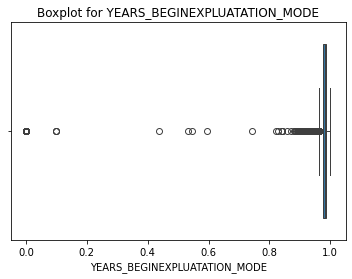

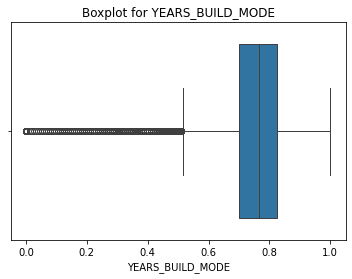

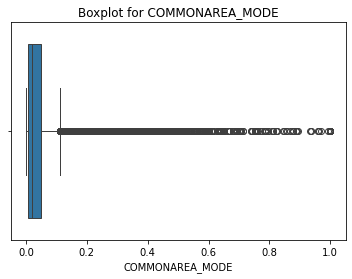

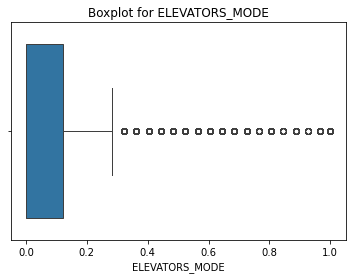

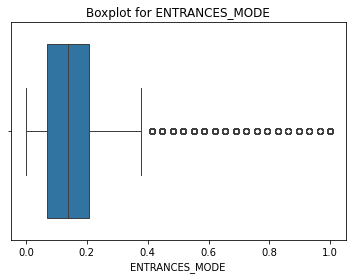

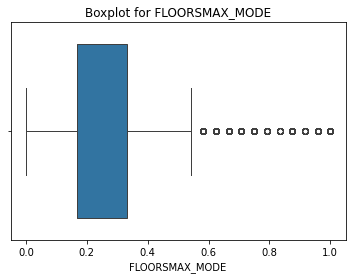

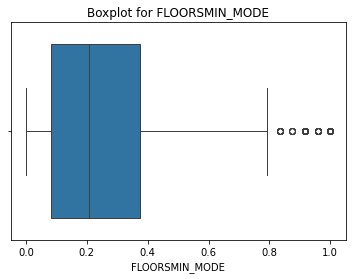

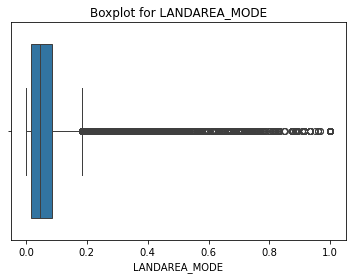

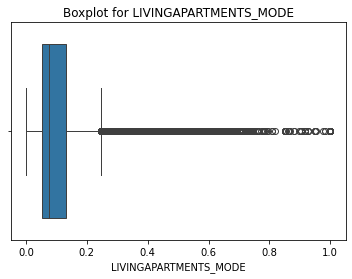

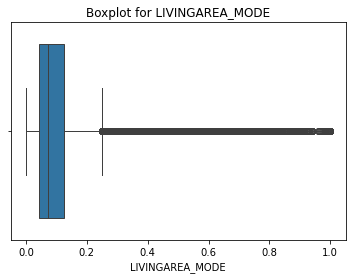

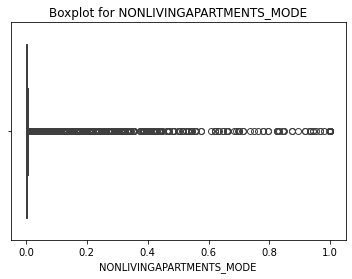

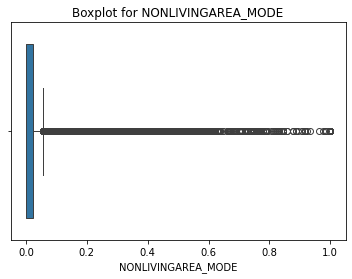

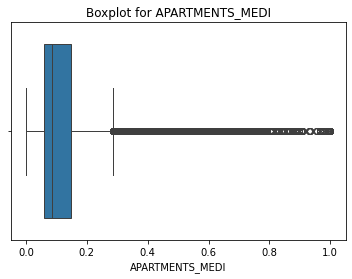

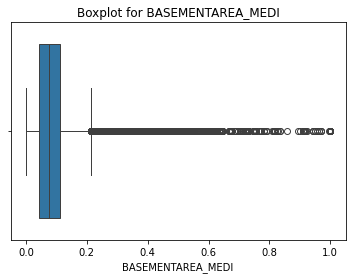

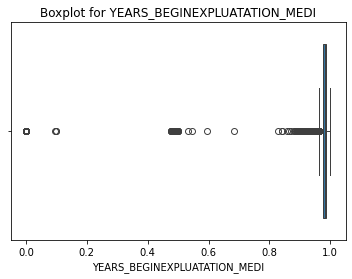

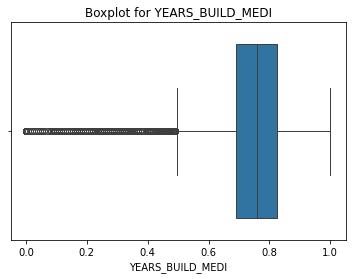

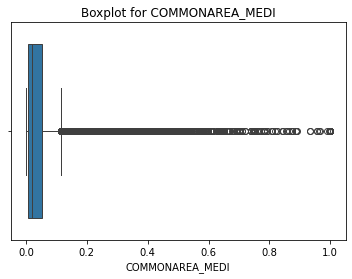

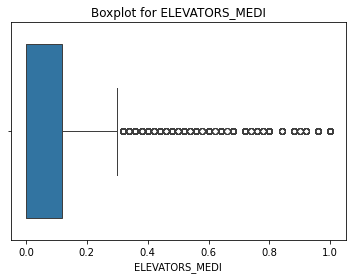

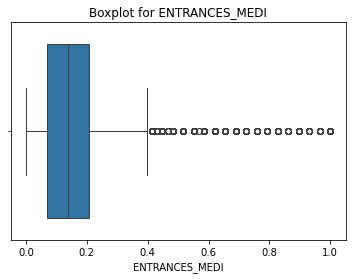

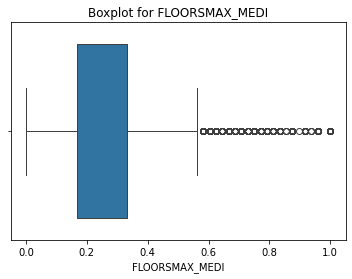

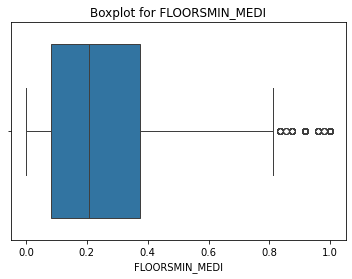

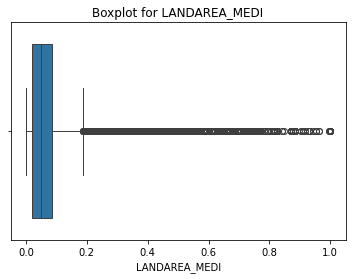

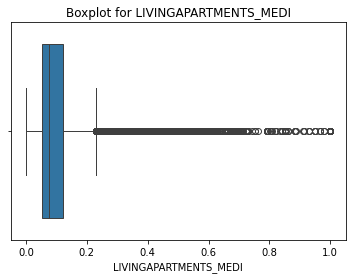

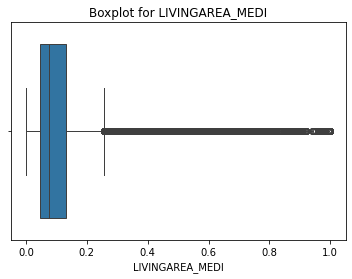

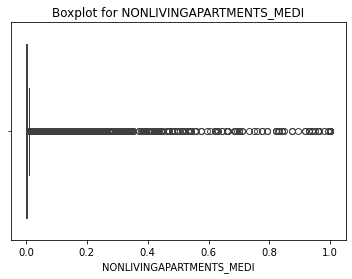

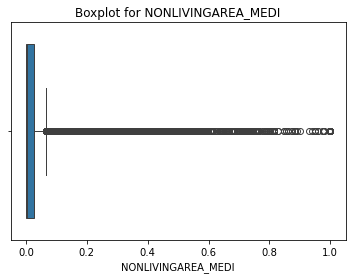

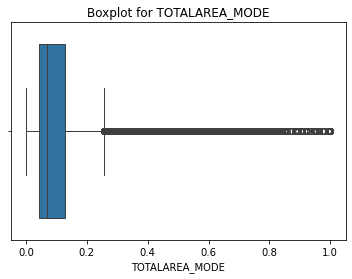

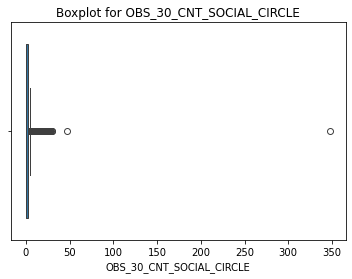

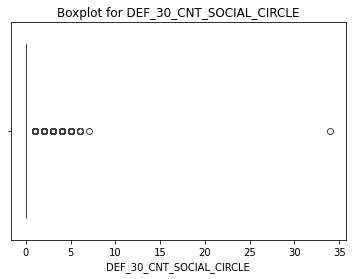

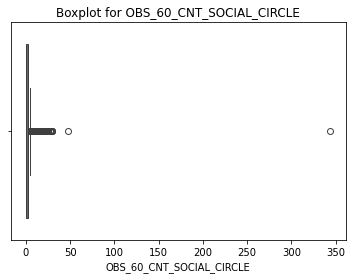

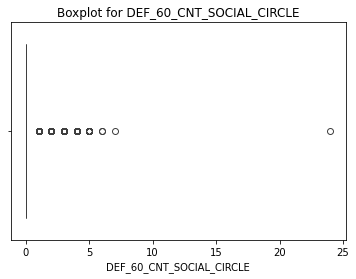

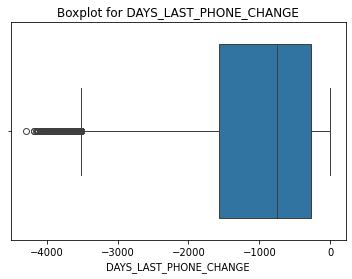

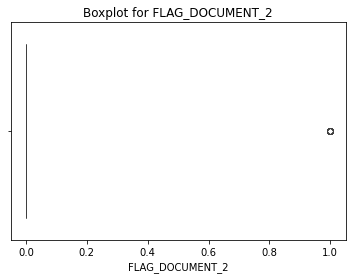

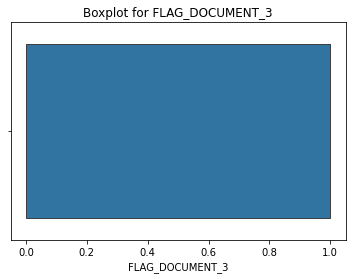

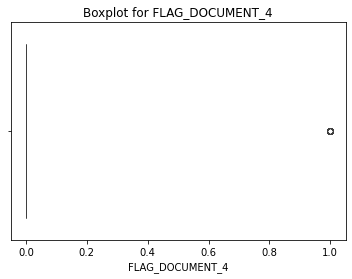

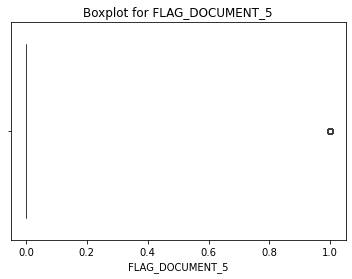

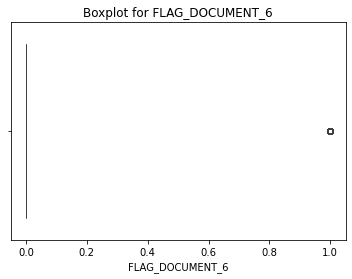

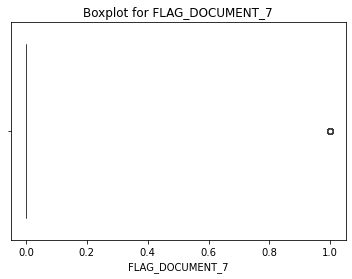

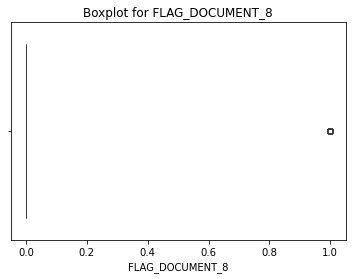

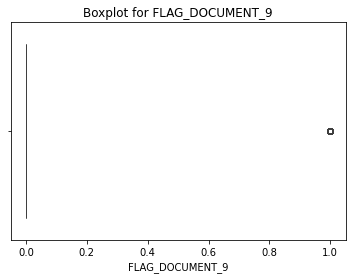

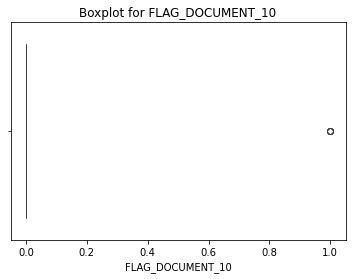

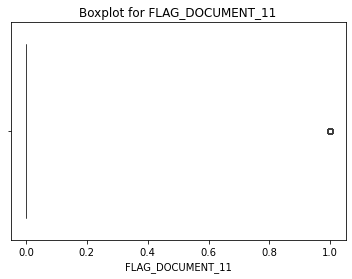

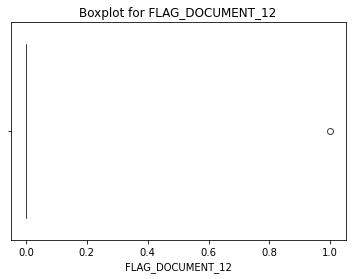

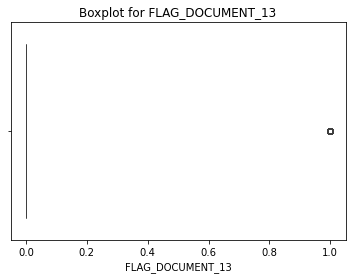

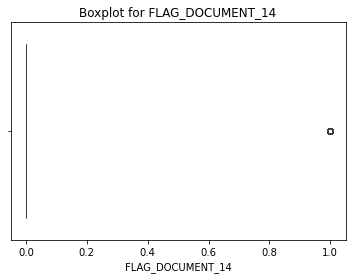

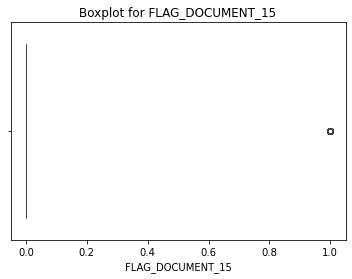

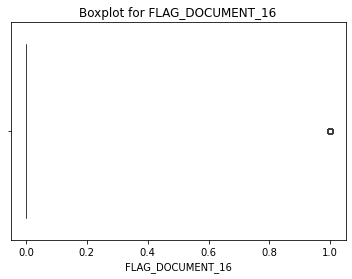

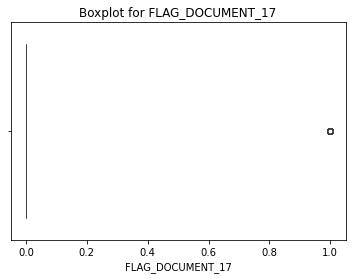

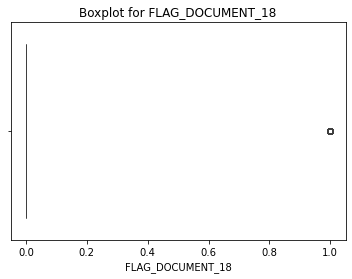

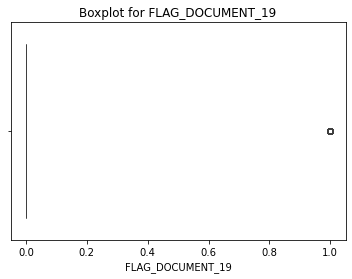

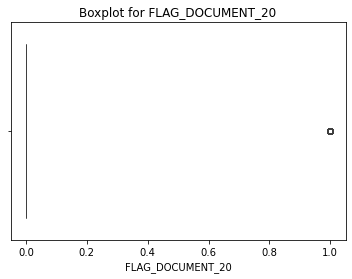

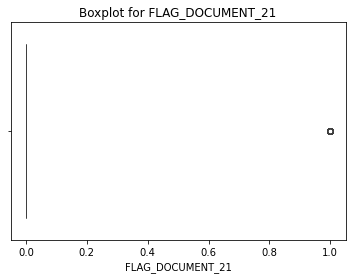

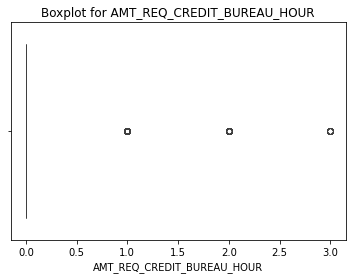

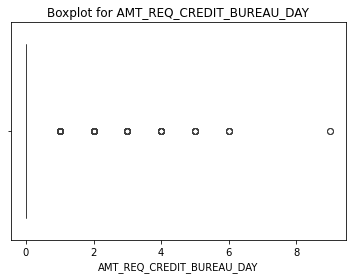

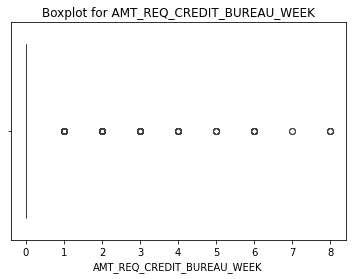

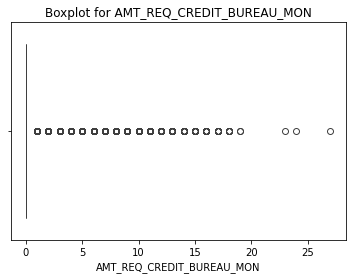

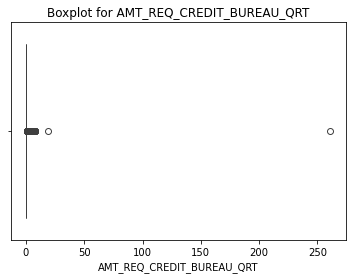

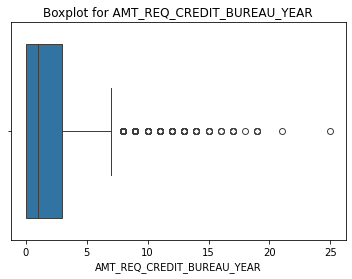

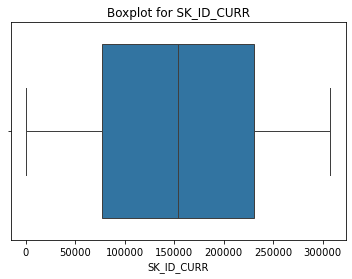

In [33]:
## Check outliters
plt.figure(figsize=(10, 7))

for column in numerical_data.columns:
    # Create a boxplot for the column
    sns.boxplot(x=numerical_data[column])

    # Set the title of the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

#### Based on the boxplot for all the numerical data. 
* We see that there are many columns that contain only 2 value (0,1) but the difference between each values is too high. Here are all the table can be seen clearly from the given boxplots

    + The Target value is imbalanced, the value 0 takes a huge part -> that can reduce the accuracy of the model
    + There are a lot of personal information following this trend, like contains phones, or check client's permanent address -> can be removed

    + All the document except document 3 -> should be removed 

In [34]:
# Check valid value
from Functions import check_value
check_value(numerical_data)

TARGET  has     >0 19876,  =0 226133  ,   <0 0,    nan: 0,   other values: 0
CNT_CHILDREN  has     >0 73676,  =0 172333  ,   <0 0,    nan: 0,   other values: 0
AMT_INCOME_TOTAL  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 245999,  =0 0  ,   <0 0,    nan: 10,   other values: 0
AMT_GOODS_PRICE  has     >0 245785,  =0 0  ,   <0 0,    nan: 224,   other values: 0
REGION_POPULATION_RELATIVE  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_BIRTH  has     >0 0,  =0 0  ,   <0 246009,    nan: 0,   other values: 0
DAYS_EMPLOYED  has     >0 44324,  =0 2  ,   <0 201683,    nan: 0,   other values: 0
DAYS_REGISTRATION  has     >0 0,  =0 59  ,   <0 245950,    nan: 0,   other values: 0
DAYS_ID_PUBLISH  has     >0 0,  =0 13  ,   <0 245996,    nan: 0,   other values: 0
OWN_CAR_AGE  has     >0 82120,  =0 1701  ,   <0 0,    nan: 162188,   other values: 0
FLAG_MOBIL

In [35]:
for i in categorical_data.columns[:8]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CONTRACT_TYPE : ['Cash loans', 'Revolving loans']

col CODE_GENDER : ['F', 'M', 'XNA']

col FLAG_OWN_CAR : ['N', 'Y']

col FLAG_OWN_REALTY : ['N', 'Y']

col NAME_TYPE_SUITE : ['Family', 'Unaccompanied', 'Spouse, partner', 'Children', 'Other_A', nan, 'Group of people', 'Other_B']

col NAME_INCOME_TYPE : ['State servant', 'Working', 'Pensioner', 'Commercial associate', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

col NAME_EDUCATION_TYPE : ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

col NAME_FAMILY_STATUS : ['Married', 'Civil marriage', 'Single / not married', 'Widow', 'Separated', 'Unknown']



In [36]:
for i in categorical_data.columns[8:]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_HOUSING_TYPE : ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']

col OCCUPATION_TYPE : ['Core staff', 'Laborers', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Private service staff', 'Medicine staff', 'Security staff', 'Accountants', 'Cooking staff', 'High skill tech staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'Waiters/barmen staff', 'IT staff', 'HR staff']

col WEEKDAY_APPR_PROCESS_START : ['MONDAY', 'WEDNESDAY', 'THURSDAY', 'SATURDAY', 'FRIDAY', 'TUESDAY', 'SUNDAY']

col ORGANIZATION_TYPE : ['School', 'Business Entity Type 3', 'Religion', 'Other', 'XNA', 'Electricity', 'Medicine', 'Self-employed', 'Transport: type 2', 'Business Entity Type 2', 'Construction', 'Housing', 'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military', 'Services', 'Security Ministries', 'Transport: type 4', 'Government', 'Emergency', 'Security', 'Trade: type 2', 'University', 'Transport: 

# EDA Process

### Univariate

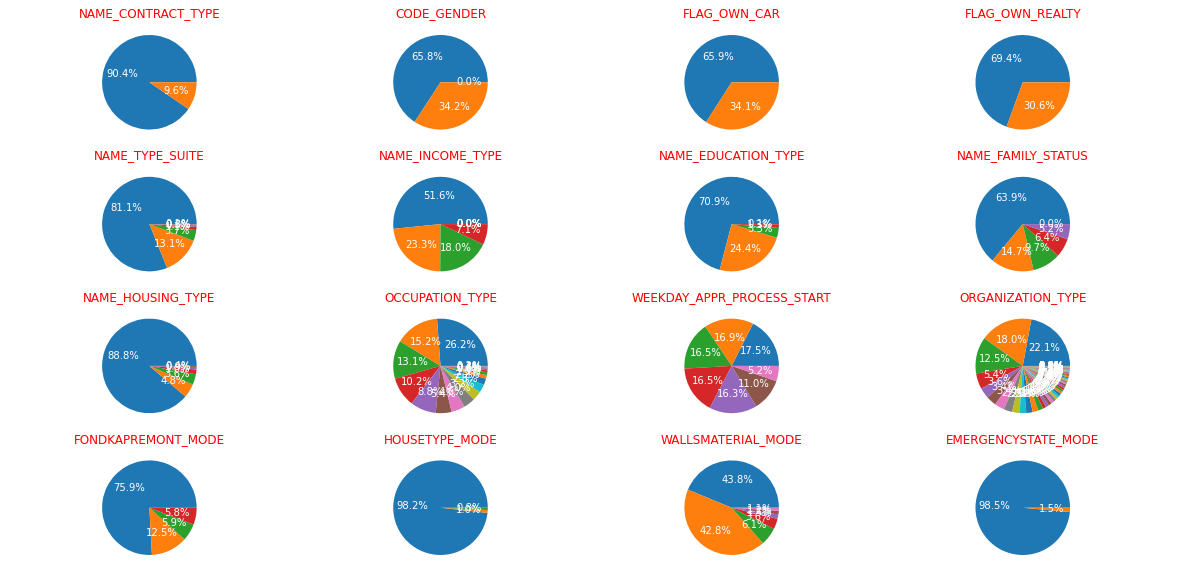

In [37]:
# Check the distribution of categorical columns
col= categorical_data.columns
fig, ax = plt.subplots(round(len(col)/4),4,figsize=(20,10))
ite = 0 
for i in range(0,round(len(col)/4)):
    for j in range(0,4):
        sizes = categorical_data[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

Followed this chart, we can see that:

* Name_housing_type 88.8% loaning clients live in their own house 
* In Name_type_suite, Almost the clients take a loan by themselves -> they are in the middle - age
* And in housetype_mode and emergencystate_mode , they have a signigicant differences between each value -> we can drop these columns 

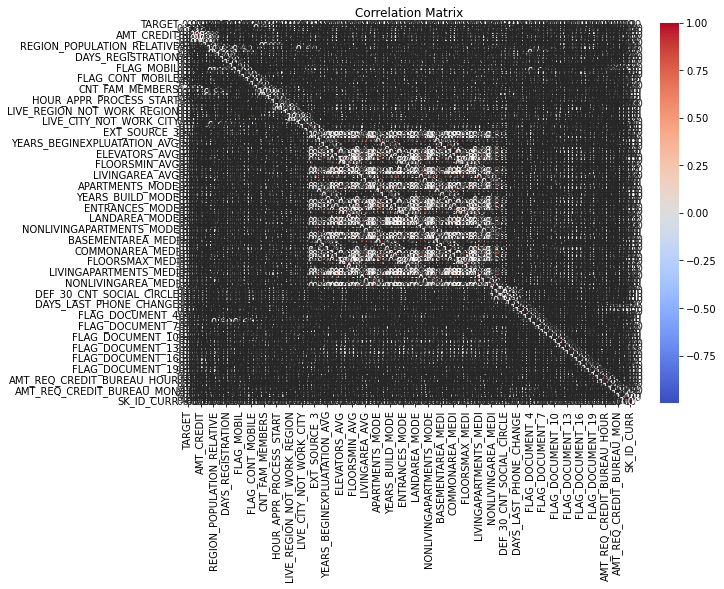

In [38]:
## Check corr between all the numerical features
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* it's hard to see so i divide this dataset into some small parts

# Bivariate and multivariate

## The Effect of all the features to the target columns
* This data set is all about the information related to clients
* I can divide it into small parts
    + Personal Information
    + Asset Information
    + Contact Information
    + Family Information
    + Working Information
    + Housing Information
    + Document Information
    + Bureau Information

In [39]:
df1.duplicated().sum()

0

### Personal Information

In [53]:
pinfo_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
                          'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
pinfo = df1[pinfo_col]
pinfo

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED
0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188
1,Cash loans,F,N,Y,0,135000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039
2,Cash loans,M,N,Y,0,121500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038
3,Cash loans,M,N,Y,0,99000.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588
4,Cash loans,M,Y,Y,0,360000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-18850,-449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,Cash loans,M,N,N,0,157500.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236
246005,Cash loans,F,N,Y,0,72000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243
246006,Cash loans,F,N,Y,0,153000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,-14966,-7921
246007,Cash loans,F,N,Y,0,171000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786


### Asset information

In [41]:
ainfocol = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE']

### Contact Information

In [42]:
minfo_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

### Family Information

In [43]:
family_info_columns = ['CNT_FAM_MEMBERS']

### Housing Information

In [44]:
# hinfo_col = 

#### Ext Source Information

In [45]:
extsourceinfo_col = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

### Document Information

In [46]:
start = df1.columns.get_loc('FLAG_DOCUMENT_2')
end = df1.columns.get_loc('FLAG_DOCUMENT_21')
dinfo_col = list(df1.columns[start:end+1])
dinfo = df1[df1.columns[df1.columns.isin(dinfo_col)]]
dinfo

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
246005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246006,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


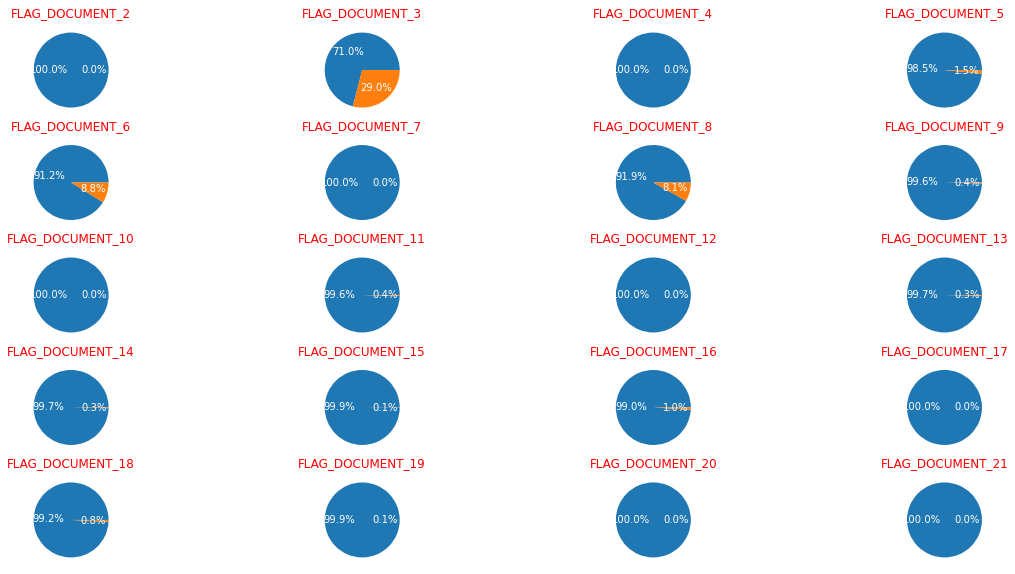

In [82]:
col= dinfo.columns
fig, ax = plt.subplots(round(len(col)/4),4,figsize=(20,10))
ite = 0 
for i in range(0,round(len(col)/4)):
    for j in range(0,4):
        sizes = dinfo[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

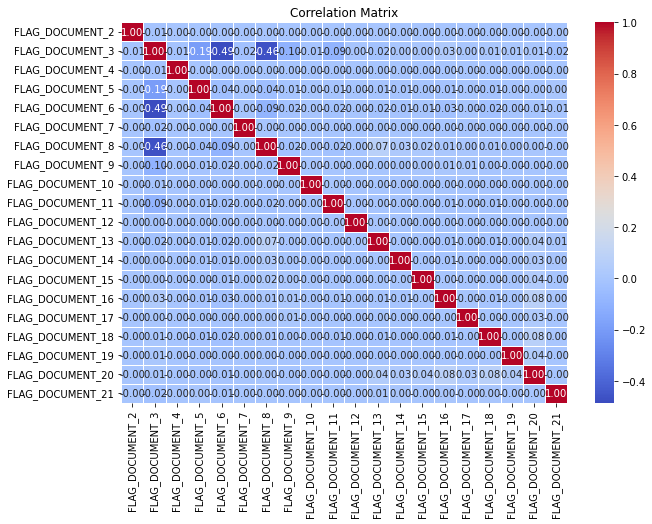

In [81]:
## Check corr,
correlation_matrix = dinfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Thông qua 2 bảng pie chart và bảng corr này, ta càng khẳng định hơn kết luận là bỏ hết tất cả các features liên quan đén document trừ document 3 do
    + Correlation cực tháp (0.00x)
    + Tỉ lệ chênh lệnh giữa các value quá cao


### Bureau Information

In [73]:
binfo_col = [
'TARGET',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]
binfo = df1[binfo_col]
binfo


,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
246004,0,NaN,NaN,NaN,NaN,NaN,NaN
246005,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,0,1.0,0.0,0.0,1.0,0.0,1.0
246007,1,0.0,0.0,0.0,0.0,0.0,0.0


* This infomation is all about the enquires of the Clients to Bureau in separting time 

--> To make easier, we can convert all of column in this df into day and summary all.

--> After that we need to check if this column is needed( corr with target)


In [75]:
## Add one column convert the value into day and sum all
binfo['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY'] = (
    binfo['AMT_REQ_CREDIT_BUREAU_HOUR'] / 24 +
    binfo['AMT_REQ_CREDIT_BUREAU_DAY'] +
    binfo['AMT_REQ_CREDIT_BUREAU_MON'] * 30 +
    binfo['AMT_REQ_CREDIT_BUREAU_YEAR'] * 365 +
    binfo['AMT_REQ_CREDIT_BUREAU_WEEK'] * 7 +
    binfo['AMT_REQ_CREDIT_BUREAU_QRT'] * 3 * 30
)
## And so, there are only 2 useful features in this df is Target and the new col
binfo = binfo[['TARGET','AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']]
binfo

,TARGET,AMT_REQ_CREDIT_BUREAU_TOTAL_DAY
0,0.0,0.000000
1,0.0,NaN
2,0.0,0.000000
3,0.0,455.000000
4,0.0,0.000000
...,...,...
246005,0.0,NaN
246006,0.0,395.041667
246007,1.0,0.000000
246008,0.0,425.000000


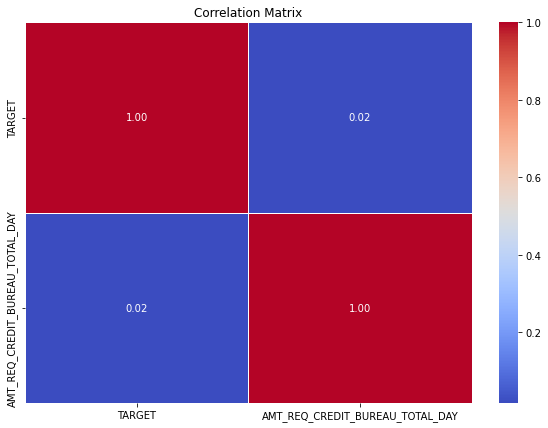

In [76]:
## Check corr,
correlation_matrix = binfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

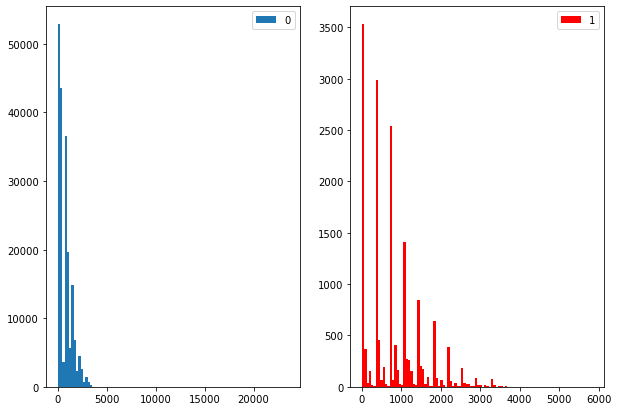

In [77]:
## Check distribution
fig,ax = plt.subplots(1,2,figsize =(10,7))
class0 = binfo[binfo['TARGET']==0]['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']
class1 = binfo[binfo['TARGET']==1]['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']
ax[0].hist(class0,bins = 100,label = 0)
ax[1].hist(class1,bins = 100,color = 'red',label= 1)
ax[0].legend()
ax[1].legend()

* Mặc dù có tỉ lệ tương quan tương đối thấp (0.02) nhưng features này nó có sự phân chia rõ ràng giữa các biến target. Hầu hêt các khách hàng được xếp vào target = 1( Trả dược nợ) đều hầu hết là các khách hàng đã có lịch sử vay từ Credit Burueau từ trước đó, còn ở biến target 0, % khách hàng chiếm nhiều nhất là khách hàng chưa từng có một khoản vay ở Credit Bureau nào. 

-> Giữ lại cột này


## 